# Spaceship RidgeClassifier (RC) Submission

In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
import sklearn 

# Bring the Data In

In [ ]:
X_df = pd.read_csv('spaceship_train_X_v2.csv')
y_df = pd.read_csv('spaceship_train_y.csv')
X_submission = pd.read_csv('spaceship_test_X_v2.csv')

y_df.drop('Unnamed: 0', axis=1, inplace=True)
X_df.head()

,PassengerId,CryoSleep,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Expenditure,NoSpending,...,CabinSide_Z,CabinDeck_A,CabinDeck_B,CabinDeck_C,CabinDeck_D,CabinDeck_E,CabinDeck_F,CabinDeck_G,CabinDeck_T,AgeEncoded
0,0001_01,0,0,-0.337530,-0.283865,-0.287383,-0.273826,-0.265831,-0.518357,1,...,0,0,1,0,0,0,0,0,0,3.0
1,0002_01,0,0,-0.172455,-0.278226,-0.245562,0.213965,-0.227033,-0.256582,0,...,0,0,0,0,0,0,1,0,0,2.0
2,0003_01,0,1,-0.272409,1.956643,-0.287383,5.692512,-0.222625,3.174596,0,...,0,1,0,0,0,0,0,0,0,4.0
3,0003_02,0,0,-0.337530,0.519986,0.333240,2.684020,-0.095651,1.322607,0,...,0,1,0,0,0,0,0,0,0,2.0
4,0004_01,0,0,0.121349,-0.240007,-0.034784,0.228181,-0.264067,-0.130318,0,...,0,0,0,0,0,0,1,0,0,1.0


In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_df, y_df, stratify=y_df, test_size=0.1, train_size=0.9, random_state=1)

# Ini buat ganti y_train and y_test ke 1D array
y_train = y_train['Transported'].values
y_test = y_test['Transported'].values

# Model!

We'll be playing with the 'alpha' coefficient with the range of 1-100, let's go.

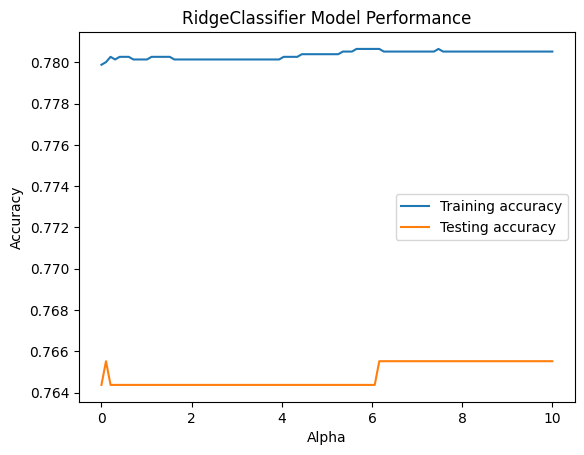

In [ ]:
from sklearn.linear_model import RidgeClassifier

# Testing with multiple alpha-coefficients
alpha_range = np.linspace(0, 10, 100)
training_accuracy = []
testing_accuracy = []

for alpha in alpha_range:
    rc = RidgeClassifier(alpha=alpha).fit(X_train, y_train)
    training_accuracy.append(rc.score(X_train, y_train))
    testing_accuracy.append(rc.score(X_test, y_test))

rc_performance = {'alpha':alpha_range, 'training_accuracy':training_accuracy, 'testing_accuracy':testing_accuracy}
rc_performance = pd.DataFrame(rc_performance)
sns.lineplot(data=rc_performance, x='alpha', y='training_accuracy', label='Training accuracy')
sns.lineplot(data=rc_performance, x='alpha', y='testing_accuracy', label='Testing accuracy')

plt.title("RidgeClassifier Model Performance")
plt.xlabel("Alpha")
plt.ylabel("Accuracy")

plt.legend()
plt.show()

In [ ]:
rc_performance.sort_values(by='testing_accuracy', ascending=False)

,alpha,training_accuracy,testing_accuracy
99,10.000000,0.780519,0.765517
79,7.979798,0.780519,0.765517
77,7.777778,0.780519,0.765517
76,7.676768,0.780519,0.765517
1,0.101010,0.780008,0.765517
...,...,...,...
30,3.030303,0.780135,0.764368
29,2.929293,0.780135,0.764368
28,2.828283,0.780135,0.764368
27,2.727273,0.780135,0.764368


## Takeaway

Ideally, shifting the 'alpha' coefficients should help the model with the generalization and might improve performance. Therefore, we will go with alpha value of 0.1

# Submission Prediction

In [ ]:
clf = RidgeClassifier(alpha=0.1)

# For training, we use ALL data from spaceship_train_X_v2.csv and spaceship_train_y.csv
clf.fit(X_df, y_df['Transported'].values)

# Generate prediction for spaceship_test_X_v2.csv
y_prediction = clf.predict(X_submission)
print(y_prediction)

[1 0 1 ... 1 1 1]
/shared-libs/python3.9/py/lib/python3.9/site-packages/sklearn/linear_model/_ridge.py:212: LinAlgWarning: Ill-conditioned matrix (rcond=9.88694e-17): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [ ]:
submission_dict = {'PassengerId':X_submission['PassengerId'], 'Transported':y_prediction.astype('bool')}
submission_dict = pd.DataFrame(submission_dict)
submission_dict

,PassengerId,Transported
0,0013_01,True
1,0018_01,False
2,0019_01,True
3,0021_01,True
4,0023_01,False
...,...,...
4272,9266_02,True
4273,9269_01,False
4274,9271_01,True
4275,9273_01,True


## Export CSV

In [ ]:
submission_dict.to_csv('spaceship_rc_a1e-1_submission.csv', index=False)

<a style='text-decoration:none;line-height:16px;display:flex;color:#5B5B62;padding:10px;justify-content:end;' href='https://deepnote.com?utm_source=created-in-deepnote-cell&projectId=2a79941c-6614-47fe-9427-0e9f23998893' target="_blank">
 </img>
Created in <span style='font-weight:600;margin-left:4px;'>Deepnote</span></a>